## Importing Libraries and Reading file

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import pymongo
import plotly.express as px

In [6]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [7]:
df = pd.read_csv("CSV/Copper modeling.xlsx.csv")

In [8]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,20200701.0,601.00


In [9]:
df.shape

(181673, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [11]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [12]:
df.drop(["material_ref","id","item_date","delivery date"],axis = True ,inplace =True)

In [13]:
df.isnull().sum()

quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

## Handling Unformatted Data

In [14]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [15]:
df.dtypes

quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
dtype: object

In [16]:
# errors='coerce' ---> If Any column cannot be converted to a numeric type, Pandas will replace that value with NaN
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [17]:
df.isnull().sum()

quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

## Statistical Information

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [19]:
# quantity and selling price values sholud not be below 0. so we converting 0 to null value.
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


## Imputing Missing values

In [20]:
df.isnull().sum()

quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     8
dtype: int64

In [21]:
df.isnull().sum()/df.isnull().count().sort_values(ascending=False)

quantity tons    0.000028
customer         0.000006
country          0.000154
status           0.000011
item type        0.000000
application      0.000132
thickness        0.000006
width            0.000000
product_ref      0.000000
selling_price    0.000044
dtype: float64

<Axes: >

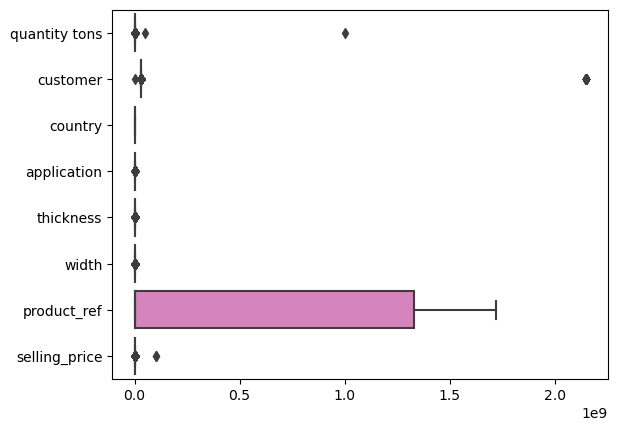

In [22]:
sns.boxplot(data=df,orient='h')

In [23]:
# drop the null rows 
df=df.dropna()

In [24]:
df.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [25]:
df.shape

(181628, 10)

## Visualization

In [26]:
# sns.pairplot(df,diag_kind='kde')

In [27]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price'],
      dtype='object')

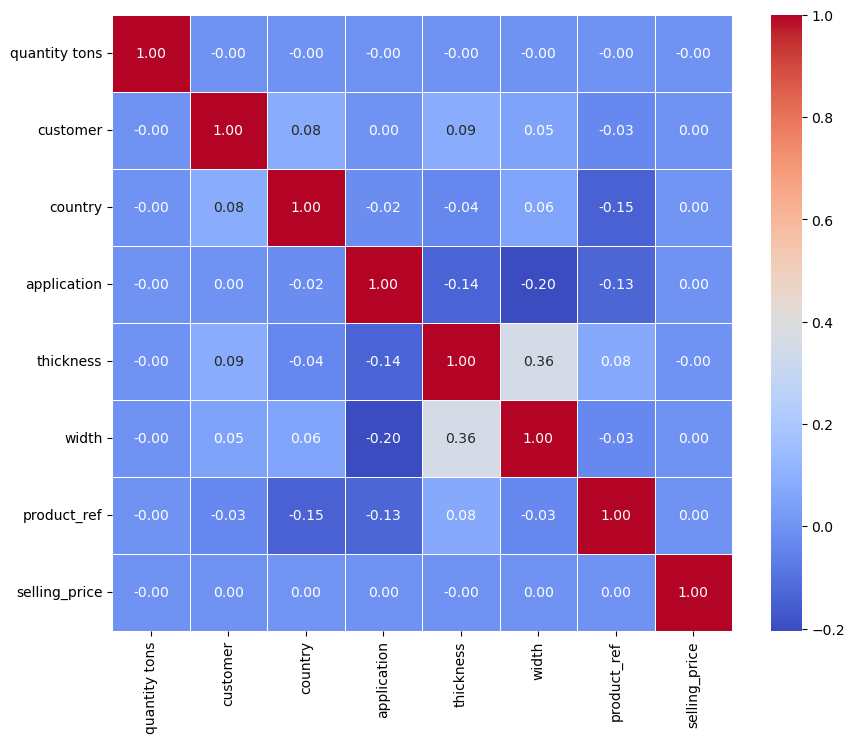

In [28]:
#get correlations of each features in dataset
selected_columns = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']
subset_df = df[selected_columns]
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

## Skewness Detection And Data Transformation(Log transformation)

Text(0.5, 1.0, 'product_ref Boxplot')

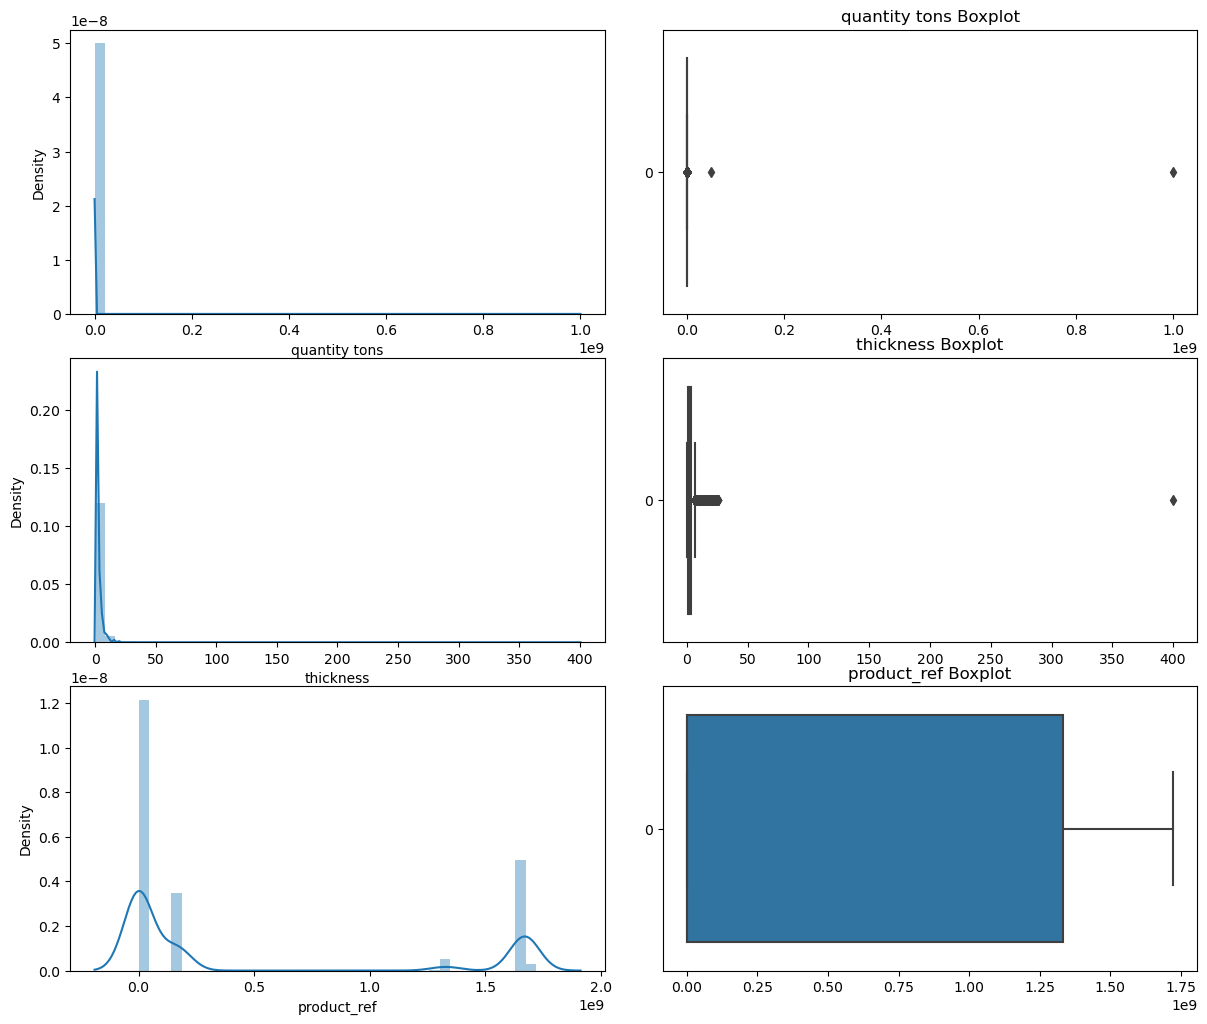

In [29]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 10)
plt.tight_layout()

a = sns.distplot(df['quantity tons'] , ax=axes[0][0])
a = sns.boxplot(df['quantity tons'] , orient = "h" , ax=axes[0][1])
a.set_title("quantity tons Boxplot",fontsize=12)


a = sns.distplot(df['thickness'] , ax=axes[1][0])
a = sns.boxplot(df['thickness'] , orient = "h" , ax=axes[1][1])
a.set_title("thickness Boxplot",fontsize=12)

a = sns.distplot(df['product_ref'] , ax=axes[2][0])
a = sns.boxplot(df['product_ref'] , orient = "h" , ax=axes[2][1])
a.set_title("product_ref Boxplot",fontsize=12)


In [30]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price'],
      dtype='object')

In [31]:
df['selling_price_log'] = np.log(df['selling_price'])

In [32]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,6.749931
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,6.643790
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,6.357842


In [33]:
df = df.drop(df[df['selling_price_log'] <= 0].index)

In [34]:
df[df['selling_price_log'] <= 0]

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log


In [35]:
df.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
selling_price        0
selling_price_log    0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.shape

(181627, 11)

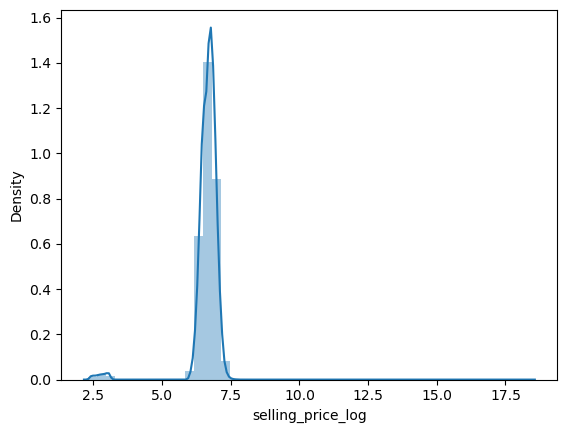

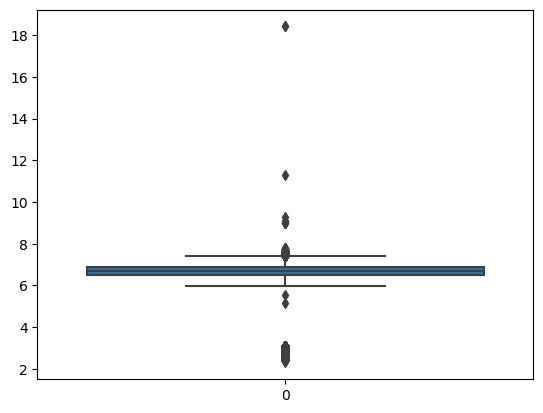

In [38]:
sns.distplot(df['selling_price_log'])
plt.show()
sns.boxplot(df['selling_price_log'])
plt.show()

In [39]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'selling_price_log'],
      dtype='object')

In [40]:
df['status'].value_counts()

status
Won                115999
Lost                34433
Not lost for AM     19566
Revised              4276
To be approved       4169
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [41]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [42]:
status_mapping = {'Won': 0, 'Draft': 1, 'To be approved': 2, 'Lost': 3, 'Not lost for AM': 4,'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8}
df['status'].replace(status_mapping, inplace=True)

In [43]:
df['status'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [44]:
df['item type'].value_counts()

item type
W         105601
S          69205
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [45]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [46]:
itemtype_mapping = {'W' : 0, 'WI' : 1, 'S' : 2, 'Others': 3, 'PL': 4, 'IPL': 5 , 'SLAWR': 6}
df['item type'].replace(itemtype_mapping, inplace=True)

In [47]:
df['item type'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [48]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,0,0,10.0,2.00,1500.0,1670798778,854.00,6.749931
1,768.024839,30202938.0,25.0,0,0,41.0,0.80,1210.0,1668701718,1047.00,6.953684
2,386.127949,30153963.0,30.0,0,1,28.0,0.38,952.0,628377,644.33,6.468211
3,202.411065,30349574.0,32.0,0,2,59.0,2.30,1317.0,1668701718,768.00,6.643790
4,785.526262,30211560.0,28.0,0,0,10.0,4.00,2000.0,640665,577.00,6.357842


In [49]:
df.corr()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
quantity tons,1.000000,-0.000659,-0.001531,0.004003,0.002236,-0.001956,-0.001402,-0.000428,-0.001086,-0.000010,-0.001041
customer,-0.000659,1.000000,0.083558,0.033077,0.081375,0.000899,0.086936,0.050522,-0.032338,0.001746,0.008785
country,-0.001531,0.083558,1.000000,-0.102477,-0.138032,-0.019356,-0.039477,0.055299,-0.147370,0.002993,-0.029195
status,0.004003,0.033077,-0.102477,1.000000,0.213214,-0.085291,0.083146,0.066523,0.067112,0.003473,0.017315
item type,0.002236,0.081375,-0.138032,0.213214,1.000000,-0.179962,0.059498,0.094756,0.086990,0.006166,-0.046527
application,-0.001956,0.000899,-0.019356,-0.085291,-0.179962,1.000000,-0.135323,-0.204453,-0.131853,0.001462,0.022738
thickness,-0.001402,0.086936,-0.039477,0.083146,0.059498,-0.135323,1.000000,0.357565,0.076531,-0.002467,-0.104589
width,-0.000428,0.050522,0.055299,0.066523,0.094756,-0.204453,0.357565,1.000000,-0.034409,0.000584,-0.069434
product_ref,-0.001086,-0.032338,-0.147370,0.067112,0.086990,-0.131853,0.076531,-0.034409,1.000000,0.002117,0.001118
selling_price,-0.000010,0.001746,0.002993,0.003473,0.006166,0.001462,-0.002467,0.000584,0.002117,1.000000,0.069989


In [50]:
df.cov()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
quantity tons,5.519550e+12,-1.557294e+08,-8.775576e+04,1.614853e+04,5.870923e+03,-8.157410e+04,-9.805882e+03,-2.631180e+05,-1.830641e+12,-7.716062e+06,-1378.814205
customer,-1.557294e+08,1.011314e+10,2.050699e+05,5.711922e+03,9.145253e+03,1.605408e+03,2.602213e+04,1.329348e+06,-2.333476e+12,5.827951e+07,497.955030
country,-8.775576e+04,2.050699e+05,5.955803e+02,-4.294485e+00,-3.764572e+00,-8.386507e+00,-2.867607e+00,3.531089e+02,-2.580606e+09,2.423513e+04,-0.401606
status,1.614853e+04,5.711922e+03,-4.294485e+00,2.948713e+00,4.091637e-01,-2.600280e+00,4.249739e-01,2.988856e+01,8.269051e+07,1.978789e+03,0.016759
item type,5.870923e+03,9.145253e+03,-3.764572e+00,4.091637e-01,1.248902e+00,-3.570647e+00,1.979119e-01,2.770699e+01,6.975485e+07,2.286595e+03,-0.029308
application,-8.157410e+04,1.605408e+03,-8.386507e+00,-2.600280e+00,-3.570647e+00,3.152123e+02,-7.151145e+00,-9.497592e+02,-1.679700e+09,8.611889e+03,0.227549
thickness,-9.805882e+03,2.602213e+04,-2.867607e+00,4.249739e-01,1.979119e-01,-7.151145e+00,8.859404e+00,2.784674e+02,1.634476e+08,-2.436803e+03,-0.175471
width,-2.631180e+05,1.329348e+06,3.531089e+02,2.988856e+01,2.770699e+01,-9.497592e+02,2.784674e+02,6.845976e+04,-6.459973e+09,5.069473e+04,-10.240194
product_ref,-1.830641e+12,-2.333476e+12,-2.580606e+09,8.269051e+07,6.975485e+07,-1.679700e+09,1.634476e+08,-6.459973e+09,5.148523e+17,5.041663e+11,452096.865085
selling_price,-7.716062e+06,5.827951e+07,2.423513e+04,1.978789e+03,2.286595e+03,8.611889e+03,-2.436803e+03,5.069473e+04,5.041663e+11,1.101156e+11,13090.957591


## Outlier Handling

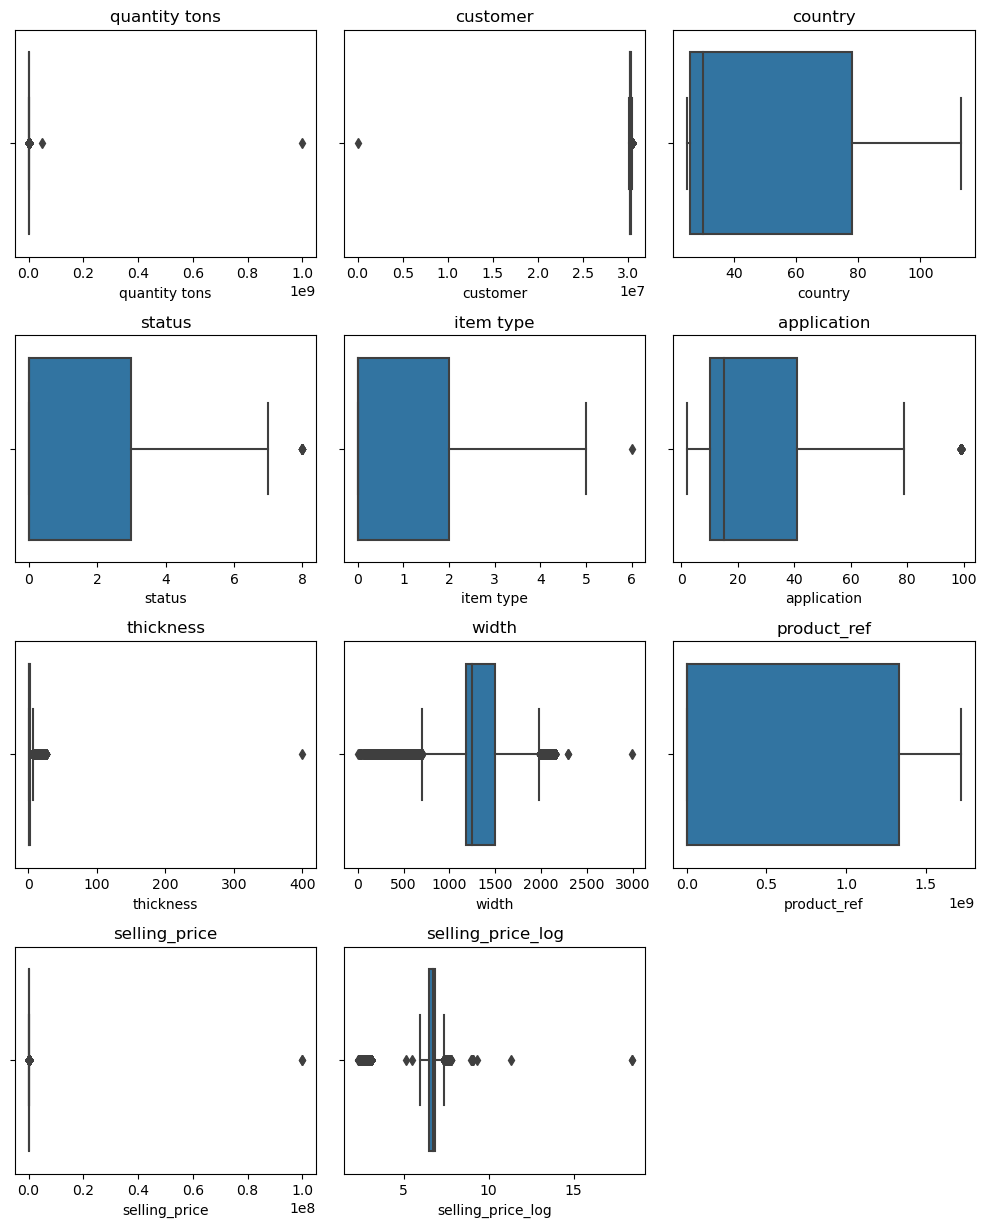

In [51]:
plt.figure(figsize=(10,15))
for i, col in enumerate(df.columns, 0):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)  

plt.tight_layout() 
plt.show()

In [52]:
# Using IQR method to handle the outliers.
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [53]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'selling_price_log'],
      dtype='object')

In [54]:
df['customer'].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [55]:
min(df['customer']),max(df['customer'])

(12458.0, 30408185.0)

In [56]:
min(df['quantity tons']),max(df['quantity tons'])

(1e-05, 1000000000.0)

In [57]:
column = ['quantity tons', 'thickness', 'width']
for i in column:
    outlier(df, i)

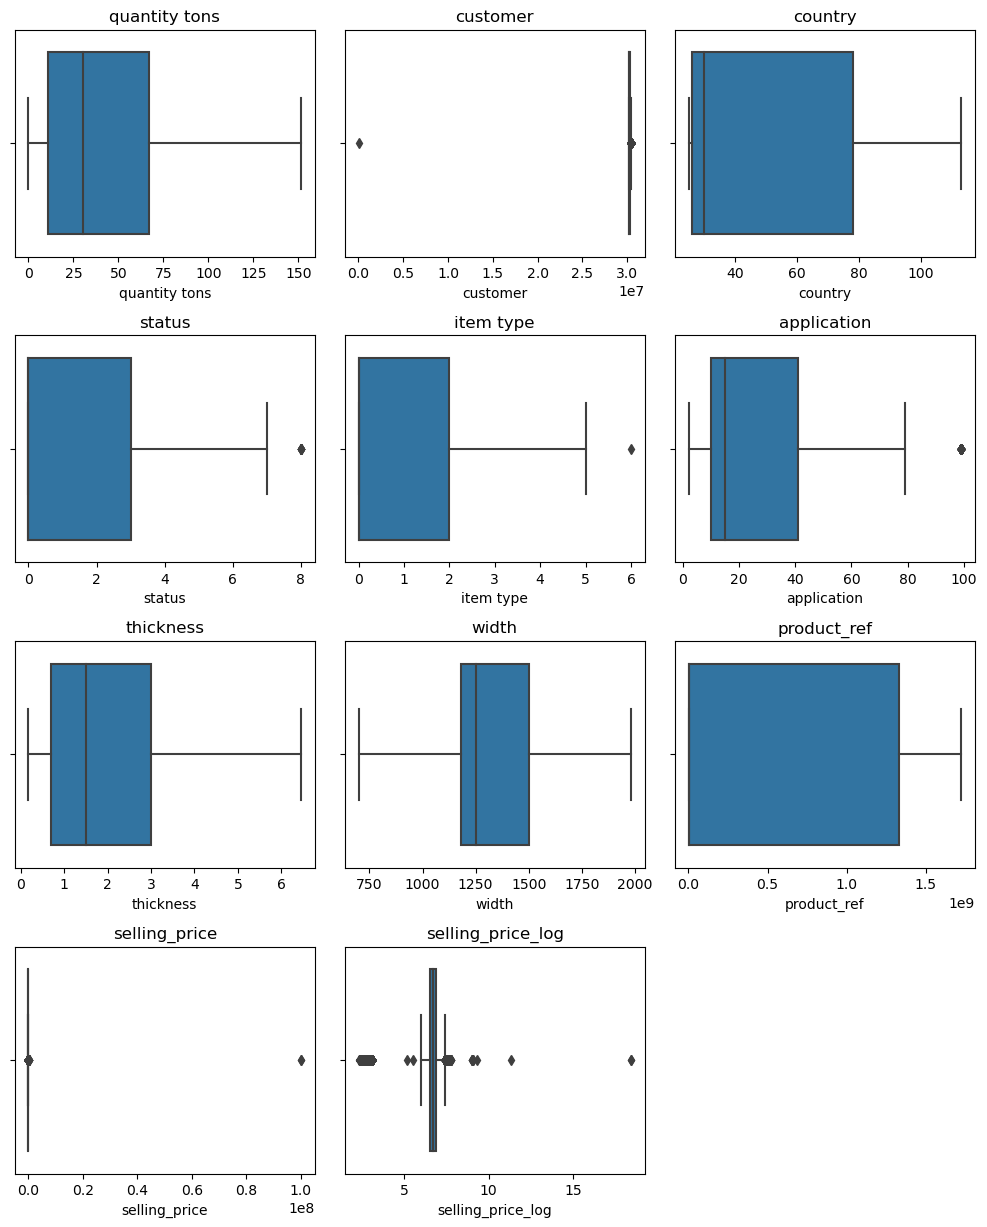

In [58]:
plt.figure(figsize=(10,15))
for i, col in enumerate(df.columns, 0):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)  

plt.tight_layout() 
plt.show()

In [59]:
df.isnull().sum()

quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
selling_price        0
selling_price_log    0
dtype: int64

In [60]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,0,0,10.0,2.00,1500.00,1670798778,854.00,6.749931
1,151.450919,30202938.0,25.0,0,0,41.0,0.80,1210.00,1668701718,1047.00,6.953684
2,151.450919,30153963.0,30.0,0,1,28.0,0.38,952.00,628377,644.33,6.468211
3,151.450919,30349574.0,32.0,0,2,59.0,2.30,1317.00,1668701718,768.00,6.643790
4,151.450919,30211560.0,28.0,0,0,10.0,4.00,1980.75,640665,577.00,6.357842


In [61]:
df1 = df.copy()

In [63]:
df1.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'selling_price_log'],
      dtype='object')

In [64]:
df1.drop(['selling_price'],axis=1,inplace=True)

In [104]:
df1.head(5)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price_log
0,54.151139,30156308.0,28.0,0,0,10.0,2.00,1500.00,1670798778,6.749931
1,151.450919,30202938.0,25.0,0,0,41.0,0.80,1210.00,1668701718,6.953684
2,151.450919,30153963.0,30.0,0,1,28.0,0.38,952.00,628377,6.468211
3,151.450919,30349574.0,32.0,0,2,59.0,2.30,1317.00,1668701718,6.643790
4,151.450919,30211560.0,28.0,0,0,10.0,4.00,1980.75,640665,6.357842


# Regression Model Building

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [63]:
x = df1.drop('selling_price_log',axis=1)
y = df1['selling_price_log']

In [64]:
x.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,54.151139,30156308.0,28.0,0,0,10.0,2.00,1500.00,1670798778
1,151.450919,30202938.0,25.0,0,0,41.0,0.80,1210.00,1668701718
2,151.450919,30153963.0,30.0,0,1,28.0,0.38,952.00,628377
3,151.450919,30349574.0,32.0,0,2,59.0,2.30,1317.00,1668701718
4,151.450919,30211560.0,28.0,0,0,10.0,4.00,1980.75,640665


In [65]:
y.head()

0    6.749931
1    6.953684
2    6.468211
3    6.643790
4    6.357842
Name: selling_price_log, dtype: float64

In [66]:
x.shape

(181627, 9)

In [67]:
x_train_rg, x_test_rg, y_train_rg, y_test_rg = train_test_split( x, y, test_size=0.30, random_state=42)

In [68]:
print(x_train_rg.shape)
print(x_test_rg.shape)
print(y_train_rg.shape)
print(y_test_rg.shape)

(127138, 9)
(54489, 9)
(127138,)
(54489,)


In [102]:
rf =  RandomForestRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()

models = [rf, dtr, knn]
metrics_list = []

for model in models:
    model.fit(x_train_rg, y_train_rg)
    y_train_pred_rg = model.predict(x_train_rg)
    y_pred_rg = model.predict(x_test_rg)
    mse_test = metrics.mean_squared_error(y_test_rg, y_pred_rg) * 100
    mae_test = metrics.mean_absolute_error(y_test_rg, y_pred_rg) * 100
    r2_test = metrics.r2_score(y_test_rg, y_pred_rg)
    rmse_test = np.sqrt(mse_test)  # Fixing the variable name here
    mse_train = metrics.mean_squared_error(y_train_rg, y_train_pred_rg) * 100
    mae_train = metrics.mean_absolute_error(y_train_rg, y_train_pred_rg) * 100
    r2_train = metrics.r2_score(y_train_rg, y_train_pred_rg)
    rmse_train = np.sqrt(mse_train)  # Fixing the variable name here

    model_metrics = {'Algorithm': str(model).split('(')[0],
                     'R2_train': r2_train,
                     'R2_test': r2_test,
                      'Mean Absolute Error_train': mae_train,
                     'Mean Absolute Error_test': mae_test,
                     'Mean Squared Error_train': mse_train,
                     'Mean Squared Error_test': mse_test,
                     'Root Mean Squared Error_train': rmse_train,
                     'Root Mean Squared Error_test': rmse_test}
                     

    metrics_list.append(model_metrics)

In [103]:
best_models = pd.DataFrame(metrics_list)

In [104]:
best_models

,Algorithm,R2_train,R2_test,Mean Absolute Error_train,Mean Absolute Error_test,Mean Squared Error_train,Mean Squared Error_test,Root Mean Squared Error_train,Root Mean Squared Error_test
0,RandomForestRegressor,0.986823,0.934667,4.325213,10.715369,0.413416,2.136047,0.642974,1.461522
1,DecisionTreeRegressor,0.996674,0.886416,0.632009,12.580241,0.104367,3.713600,0.323059,1.927070
2,KNeighborsRegressor,0.665893,0.494579,13.820724,17.510095,10.482492,16.524640,3.237668,4.065051


#### Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8],
}

rf = RandomForestRegressor()
x_train_rg, x_test_rg, y_train_rg, y_test_rg = train_test_split( x, y, test_size=0.30, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5 , n_jobs=-1, verbose=3)
grid_search.fit(x_train_rg, y_train_rg)


print("Best Cross-validated Parameters: ", grid_search.best_params_)
print("Best Cross-validated Score: ", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Cross-validated Parameters:  {'max_depth': 20, 'max_features': None, 'min_samples_split': 8, 'n_estimators': 200}
Best Cross-validated Score:  0.926513099020152


In [70]:
rf_rg = RandomForestRegressor(n_estimators = 200, min_samples_split = 8, max_depth = 20, max_features = None)
rf_rg.fit(x_train_rg,y_train_rg)

RandomForestRegressor(max_depth=20, max_features=None, min_samples_split=8,
                      n_estimators=200)

In [71]:
x_pred_rg=rf_rg.predict(x_train_rg)

In [72]:
y_pred_rg=rf_rg.predict(x_test_rg)

In [73]:
metrics.mean_squared_error(y_test_rg,y_pred_rg)

0.02002712149113177

In [74]:
metrics.mean_absolute_error(y_test_rg, y_pred_rg)

0.10788788851759709

In [75]:
print(metrics.r2_score(y_train_rg, x_pred_rg))

0.9620606172254446


In [76]:
print(metrics.r2_score(y_test_rg,y_pred_rg))

0.9387452179880557


In [78]:
# Saving the model in pickel file

import pickle
with open('RegressorModel_Selling_Price_Predt.pkl', 'wb') as file:
    pickle.dump(rf_rg, file)

In [79]:
# Loading the  regressor model 
with open('RegressorModel_selling_Price_Predt.pkl','rb') as file:
    reg_mod= pickle.load(file)


In [81]:
x.head(1)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,54.151139,30156308.0,28.0,0,0,10.0,2.0,1500.0,1670798778


In [82]:
array=[[54.151139,30156308.0,28.0,0,0,10.0,2.0,1500.0,1670798778]]

In [83]:
array

[[54.151139, 30156308.0, 28.0, 0, 0, 10.0, 2.0, 1500.0, 1670798778]]

In [84]:
y[0]  #Actuall

6.74993119378857

In [85]:
# Predicted
result=reg_mod.predict(array)
print(result) 

[6.58880242]


#### Actual Value Is 6.74993119378857 Random Foreset Predict it as 6.59852939

# Classification Model

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report,roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE

In [66]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,0,0,10.0,2.00,1500.00,1670798778,854.00,6.749931
1,151.450919,30202938.0,25.0,0,0,41.0,0.80,1210.00,1668701718,1047.00,6.953684
2,151.450919,30153963.0,30.0,0,1,28.0,0.38,952.00,628377,644.33,6.468211
3,151.450919,30349574.0,32.0,0,2,59.0,2.30,1317.00,1668701718,768.00,6.643790
4,151.450919,30211560.0,28.0,0,0,10.0,4.00,1980.75,640665,577.00,6.357842


In [67]:
df.shape

(181627, 11)

In [68]:
df['status'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

#### 'Won': 0 ; 'Lost': 3

In [69]:
df_cls = df[df['status'].isin([0,3])]
len(df_cls)

150432

In [70]:
df_cls['status'].value_counts()

status
0    115999
3     34433
Name: count, dtype: int64

In [71]:
df_cls['status'].value_counts(normalize=True)

status
0    0.771106
3    0.228894
Name: proportion, dtype: float64

In [72]:
df_cls['status'].replace(3 , 1, inplace=True)

In [73]:
df_cls['status'].value_counts() # 0 --> WON, 1 --> LOST

status
0    115999
1     34433
Name: count, dtype: int64

In [74]:
x = df_cls.drop('status', axis=1)
y = df_cls['status']

In [75]:
sm = SMOTE(sampling_strategy=.45,random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(x, y)

In [76]:
y_train_resample.value_counts()

status
0    115999
1     52199
Name: count, dtype: int64

In [77]:
X_train_resample

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,0,10.0,2.000000,1500.00,1670798778,854.000000,6.749931
1,151.450919,30202938.0,25.0,0,41.0,0.800000,1210.00,1668701718,1047.000000,6.953684
2,151.450919,30153963.0,30.0,1,28.0,0.380000,952.00,628377,644.330000,6.468211
3,151.450919,30349574.0,32.0,2,59.0,2.300000,1317.00,1668701718,768.000000,6.643790
4,151.450919,30211560.0,28.0,0,10.0,4.000000,1980.75,640665,577.000000,6.357842
...,...,...,...,...,...,...,...,...,...,...
168193,151.450919,30403833.0,26.0,0,28.0,1.150000,911.00,628377,635.387175,6.454222
168194,39.507692,30278678.0,77.0,0,15.0,6.450000,1500.00,640405,980.628413,6.887558
168195,3.110952,30211560.0,28.0,0,10.0,6.175399,1980.75,640665,519.610223,6.253079
168196,108.895675,30156308.0,28.0,0,10.0,4.905670,1980.75,640665,547.000000,6.304449


In [78]:
y_train_resample.value_counts(normalize=True)

status
0    0.689657
1    0.310343
Name: proportion, dtype: float64

In [79]:
# Orginal Shape of DataSet
print(x.shape)
print(y.shape)
# After Resampling with Somte
print(X_train_resample.shape)
print(y_train_resample.shape)

(150432, 10)
(150432,)
(168198, 10)
(168198,)


In [83]:
x_train, x_test, y_train, y_test = train_test_split( X_train_resample, y_train_resample, test_size=0.30, random_state=42)

In [84]:
x_train.shape,x_test.shape

((117738, 10), (50460, 10))

In [85]:
x_train

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price,selling_price_log
137093,25.937878,30206203.0,26.0,2,41.0,0.30,1240.0,611993,1198.00,7.088409
10849,9.697097,30160005.0,78.0,0,41.0,1.82,1120.0,164141591,929.00,6.834109
117163,60.611597,30299349.0,25.0,0,25.0,0.60,1202.0,628377,646.00,6.470800
143801,49.821416,30405913.0,26.0,2,38.0,2.00,1236.0,164141591,618.00,6.426488
129314,21.049418,30165992.0,77.0,2,10.0,0.75,1000.0,164141591,620.00,6.429719
...,...,...,...,...,...,...,...,...,...,...
119879,6.146746,30196884.0,84.0,0,10.0,1.50,1147.0,164141591,713.41,6.570056
103694,32.567761,30267268.0,28.0,0,41.0,0.43,1486.0,611993,1101.00,7.003974
131932,61.262653,30206248.0,26.0,2,15.0,4.00,1500.0,1670798778,562.00,6.331502
146867,104.561775,30397632.0,78.0,2,10.0,0.50,1250.0,164141591,621.00,6.431331


In [86]:
x_test

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price,selling_price_log
146439,22.072053,30205825.0,25.0,0,10.0,1.250000,1705.00,1693867550,595.000000,6.388561
44033,65.368039,30157111.0,78.0,0,41.0,0.880000,1500.00,611993,986.000000,6.893656
49435,4.977580,30232042.0,28.0,0,41.0,0.500000,1250.00,611993,1075.000000,6.980076
152661,151.450919,30202645.0,32.0,0,10.0,1.291464,1295.00,628377,861.447147,6.758572
97396,26.558580,30272192.0,28.0,2,41.0,0.550000,1250.00,611993,1018.000000,6.925595
...,...,...,...,...,...,...,...,...,...,...
78909,2.018245,30206006.0,26.0,0,56.0,3.000000,800.00,1670798778,646.000000,6.470800
100589,12.080353,30342192.0,32.0,0,41.0,0.970000,1268.00,611993,951.000000,6.857514
129949,50.354646,30199065.0,26.0,2,10.0,2.000000,1000.00,1332077137,602.000000,6.400257
73330,1.534746,30213686.0,78.0,0,10.0,6.000000,1980.75,640665,751.000000,6.621406


In [165]:
rf =  RandomForestClassifier()
dtr = DecisionTreeClassifier()
knn = KNeighborsClassifier()

models = [rf, dtr, knn]
metrics_list = []

for model in models:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracy_metrics = {'Algorithm'    : str(model).split('(')[0],
                        'Accuracy_Train': accuracy_train,
                        'Accuracy_Test' : accuracy_test}

    metrics_list.append(accuracy_metrics)

In [166]:
Best_cls_model =pd.DataFrame(metrics_list)
Best_cls_model

,Algorithm,Accuracy_Train,Accuracy_Test
0,RandomForestClassifier,0.999932,0.939160
1,DecisionTreeClassifier,0.999932,0.912802
2,KNeighborsClassifier,0.935458,0.898197


In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 8],
}

rf = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split( X_train_resample, y_train_resample, test_size=0.30, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

print("Best Cross-validated Parameters: ", grid_search.best_params_)
print("Best Cross-validated Score: ", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Cross-validated Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validated Score:  0.9354159474854887


In [87]:
rf_cls = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_split = 2, n_estimators = 200)
rf_cls.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [88]:
x_pred=rf_cls.predict(x_train)

In [89]:
y_pred=rf_cls.predict(x_test)

In [90]:
# Training Accuracy
metrics.accuracy_score(y_train, x_pred)

0.9999320525233995

In [91]:
# Testing Accuracy
metrics.accuracy_score(y_test, y_pred)

0.9402497027348394

In [92]:
# Testing Confution Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[33346  1430]
 [ 1585 14099]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     34776
           1       0.91      0.90      0.90     15684

    accuracy                           0.94     50460
   macro avg       0.93      0.93      0.93     50460
weighted avg       0.94      0.94      0.94     50460



In [93]:
# Training Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, x_pred))
print("Classification Report:")
print(classification_report(y_train, x_pred))

Confusion Matrix:
[[81217     6]
 [    2 36513]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81223
           1       1.00      1.00      1.00     36515

    accuracy                           1.00    117738
   macro avg       1.00      1.00      1.00    117738
weighted avg       1.00      1.00      1.00    117738



In [94]:
import pickle
with open('ClassifierModel_Stauts_Predt.pkl', 'wb') as file:
    pickle.dump(rf_cls, file)

In [95]:
# Loading the  regressor model 
with open('ClassifierModel_Stauts_Predt.pkl','rb') as file:
    reg_cls= pickle.load(file)

In [96]:
x.head(1)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price,selling_price_log
0,54.151139,30156308.0,28.0,0,10.0,2.0,1500.0,1670798778,854.0,6.749931


In [97]:
array=[[54.151139, 30156308.0, 28.0 , 0 , 10.0,2.00,1500.00,1670798778,854.00,6.749931]]

In [98]:
array

[[54.151139,
  30156308.0,
  28.0,
  0,
  10.0,
  2.0,
  1500.0,
  1670798778,
  854.0,
  6.749931]]

In [99]:
# Actual
y.head(1)

0    0
Name: status, dtype: int64

In [100]:
# Predicted
result=reg_cls.predict(array)
print(result) 

[0]


In [101]:
if result==0:
    print("WON")
else:
    print("LOST")

WON


#### Actual Value Is 0(Won) Random Foreset Predict it has 0(Won)